<h1>
    Thermodynamics of Materials AD19: <br>
    <b>Class Activity 02</b>
</h1>

<table width="75%" align="center">
    <tr>
        <th align="left" colspan="2">
            <h2><b>Team<b>:</b></h2>
        </th>
    </tr>
    <tr>
        <td><h3>Antonio Osamu Katagiri Tanaka</h3></td>
        <td><h4>A01212611@itesm.mx</h4></td>
    </tr>
    <tr>
        <td><h3>Angel Manuel Villalba Rodríguez</h3></td>
        <td><h4>A00828035@itesm.mx</h4></td>
    </tr>
</table>

<h2>Leharne, S. (2017). <b>The physical chemistry of high-sensitivity differential scanning calorimetry of biopolymers.</b> ChemTexts, 3(1), 1–12. https://doi.org/10.1007/s40828-016-0038-0</h2>

---

<h1>Figure 7a.</h1>

In [1]:
# PYTHON LIBRARIES
%matplotlib inline

import numpy as np
np.seterr(divide='ignore', invalid='ignore')
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('xtick', labelsize=15)     
plt.rc('ytick', labelsize=15)

from scipy import special, optimize

# DATA FIG 7a
data_df = pd.read_csv("./fig7a_data.txt", delimiter=",");
data_df = data_df.sort_values(by=['T']);
data_T  = data_df.iloc[:]['T'];
data_c  = data_df.iloc[:]['C'];
T = np.array(data_T);
C = np.array(data_c);

Equation 31 - rewritten:

$$ \Delta C_P (T) = (d - b)T + (c - a) $$

In [2]:
# eq 31 - rewritten
def Delta_Cp_(T, a, b, c, d):
    res = (d - b)*T + (c - a);
    return res;

Equation 33 - rewritten:

$$ K(T) = \frac{K_P (T)}{K_P (T_{ref})} = e^{\frac{\Delta H_{vH,ref}}{R} \left(\frac{1}{T_{ref}} -\frac{1}{T}\right) + \frac{c - a}{R} \left(ln\left(\frac{T}{T_{ref}}\right) + \frac{T_{ref}}{T} - 1\right) + \frac{(d - b)}{2R} \left(T - T_{ref} - {T_{ref}}^2 \left(\frac{1}{T_{ref}} - \frac{1}{T}\right) \right)} $$

In [3]:
# eq 33 - rewritten
def K_(T, Delta_H_v_ref, T_ref, a, b, c, d):
    # x = [T, Delta_H_cal_ref, Delta_H_v_ref, T_ref, , a, b, c, d]

    R = 8.314/1000;
        
    pwr1 = (Delta_H_v_ref/R) * ((1/T_ref) - (1/T));
    
    fac1 = (c - a)/R;
    fac2 = np.log(T/T_ref) + (T_ref/T) - 1;
    pwr2 = fac1 * fac2;
    
    fac3 = (d - b)/(2*R);
    fac4 = T - T_ref - (T_ref**2 * ((1/T_ref) - (1/T)));
    pwr3 = fac3 * fac4;
    
    res = np.exp(pwr1 + pwr2 + pwr3);
    return res

Equation 18:

$$ f_D = f(T) = \frac{K(T)}{1 + K(T)} $$

In [4]:
#eq 18
def f_(T, Delta_H_v_ref, T_ref, a, b, c, d):
    
    K = K_(T, Delta_H_v_ref, T_ref, a, b, c, d)
    
    nume = K;
    deno = 1 + K;
    
    res = nume/deno;
    return res;

$$\Delta H_{cal}(T) = H_{cal,ref} + \Delta C_P(T - T_{ref})$$
$$and$$
$$\Delta H_{vH}(T) = H_{vH,ref} + \Delta C_P(T - T_{ref})$$

In [5]:
def Delta_H_cal_(T, Delta_H_cal_ref, T_ref, a, b, c, d):
    Delta_Cp = Delta_Cp_(T, a, b, c, d);
    
    return Delta_H_cal_ref + Delta_Cp*(T - T_ref);

def Delta_H_v_(T, Delta_H_v_ref, T_ref, a, b, c, d):
    Delta_Cp = Delta_Cp_(T, a, b, c, d);
    
    return Delta_H_v_ref + Delta_Cp*(T - T_ref);

$$ C_{P,N} = a + bT $$
$$and$$
$$ C_{P,D} = c + dT $$

In [6]:
def Cp_N_(T, a, b):
    return a + b*T;

def Cp_D_(T, c, d):
    return c + d*T;

Equation 29 - rewritten:

$$ C_{P,xs} = \frac{\Delta H_{cal} (T) \Delta H_{vH} (T)}{R T^2} \frac{1}{\frac{1}{f_D(T)} + \frac{1}{1 - f_D(T)}} + \frac{\Delta H_{cal,ref}}{\Delta H_{vH,ref}} (f_D(T) \Delta C_P(T) + C_{P,N}(T)) $$

In [7]:
#eq 29 - rewritten
def C_(T, Delta_H_cal_ref, Delta_H_v_ref, T_ref, a, b, c, d):
    # x = [Delta_cal, Delta_H_v_ref, T_ref, a, b, c, d]
    
    R = 8.314/1000;
    Delta_Cp = Delta_Cp_(T, a, b, c, d);
    Delta_H_cal = Delta_H_cal_(T, Delta_H_cal_ref, T_ref, a, b, c, d)
    Delta_H_v = Delta_H_v_(T, Delta_H_v_ref, T_ref, a, b, c, d)
    fd = f_(T, Delta_H_v_ref, T_ref, a, b, c, d)
    Cp_N = Cp_N_(T, a, b)
    
    fac1 = (Delta_H_cal*Delta_H_v)/(R * T**2);
    fac2 = 1/((1/fd) + (1/(1 - fd)));
    sum1 = fac1 * fac2;
    
    fac3 = Delta_H_cal_ref/Delta_H_v_ref;
    fac4 = fd*Delta_Cp + Cp_N;
    sum2 = fac3 * fac4;
    
    res = sum1 + sum2
    return res;

In [8]:
# function to fetch a reasonable initial guesses for T_ref
def T_ref_(T, C):
    maxC = max(C);
    for i in range(len(C)):
        if C[i] == maxC:
            return int(T[i]+2);

In [11]:
# reasonable initial guesses for EOS parameters
Delta_H_cal_ref = 150
Delta_H_v_ref = 150
a = -30.0;
b = 0.11;
c = 9.0;
d = 0.01;

# PRINT table with fittig parameters
tmplt_str_l = "  ".join(["{:<15}"] + ["{:<15}"]*7);
tmplt_str_s = "  ".join(["{:<15}"] + ["{:<15.7}"]*7);
print('Fitting')
print(tmplt_str_l.format(*['parameters:', 'Delta_H_cal_ref', 'Delta_H_vH_ref', 'T_ref', 'a', 'b', 'c', 'd']));
print("-" * 130);

T_ref = T_ref_(T, C); # reasonable initial guesses for T_ref EOS parameter
C_prev = C_(T, Delta_H_cal_ref, Delta_H_v_ref, T_ref, a, b, c, d);

p0 = Delta_H_cal_ref, Delta_H_v_ref, T_ref, a, b, c, d
results = optimize.curve_fit(C_, T, C, p0)

Delta_cal_H_ref = results[0][0];
Delta_v_H_ref = results[0][1];
T_ref = results[0][2];
a = results[0][3];
b = results[0][4];
c = results[0][5];
d = results[0][6];

C_fit = C_(T, Delta_cal_H_ref, Delta_v_H_ref, T_ref, a, b, c, d);
print(tmplt_str_s.format('Figure 7a', *results[0], 0));

Fitting
parameters:      Delta_H_cal_ref  Delta_H_vH_ref   T_ref            a                b                c                d              
----------------------------------------------------------------------------------------------------------------------------------
Figure 7a        368.8688         411.8212         332.515          -225.2817        0.7393988        16.2804          0.02099285     


<module 'matplotlib.pyplot' from 'C:\\Users\\oskat\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

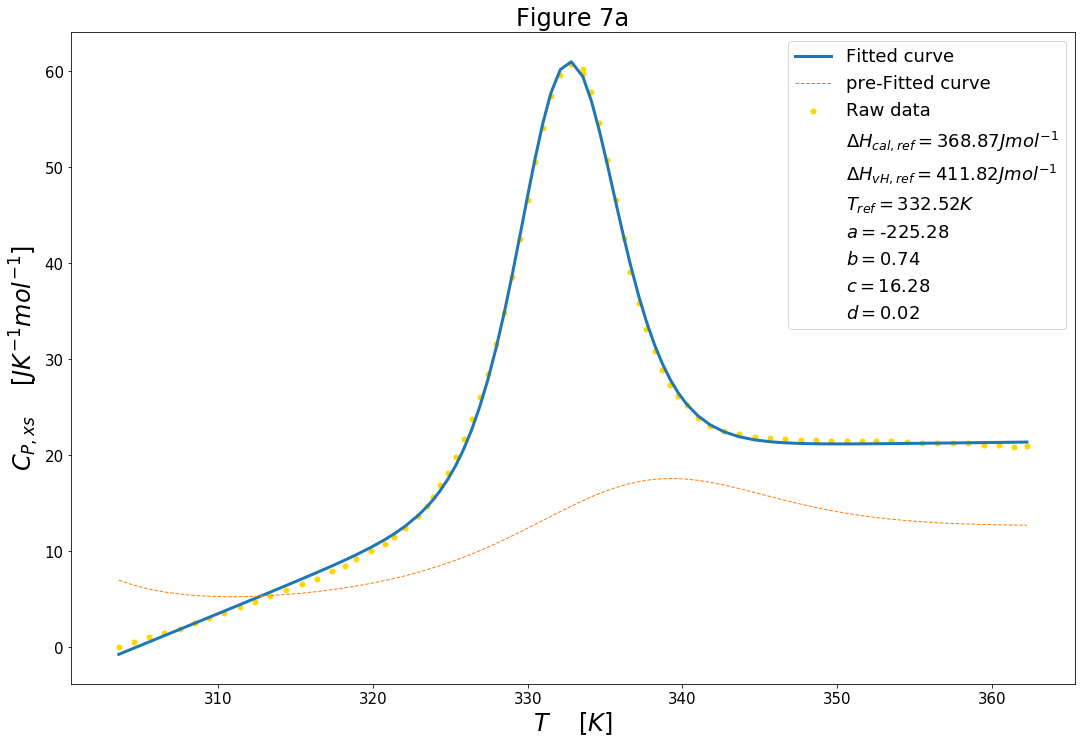

In [13]:
# PLOT FIG 1
scale = 6;
fig, ax = plt.subplots(figsize=(3*scale, 2*scale));

# Plot
plt.plot(T, C_fit, '-', linewidth=3, label='Fitted curve')
plt.scatter(T, C, s=25, color='gold', label='Raw data');

ax.set(autoscale_on=False)
plt.plot(T, C_prev, '--', linewidth=1, label='pre-Fitted curve')

# Print fitting parameters as plot legends
x = T[0]
y = C[0]
plt.scatter(x, y, s=0, label=r'$\Delta H_{cal,ref} = $' + str(round(Delta_cal_H_ref, 2)) + r'$J {mol}^{-1}$')
plt.scatter(x, y, s=0, label=r'$\Delta H_{vH,ref} = $' + str(round(Delta_v_H_ref, 2)) + r'$J {mol}^{-1}$')
plt.scatter(x, y, s=0, label=r'$T_{ref} = $' + str(round(T_ref, 2)) + r'$K$')
plt.scatter(x, y, s=0, label=r'$a = $' + str(round(a, 2)))
plt.scatter(x, y, s=0, label=r'$b = $' + str(round(b, 2)))
plt.scatter(x, y, s=0, label=r'$c = $' + str(round(c, 2)))
plt.scatter(x, y, s=0, label=r'$d = $' + str(round(d, 2)))

# Display plots
plt.yscale('linear');
plt.xlabel(r'$T$' + '    ' + r'$[K]$', fontsize=24);
plt.ylabel(r'$C_{P,xs}$' + '    ' + r'$[J K^{-1} mol^{-1}]$', fontsize=24);
plt.title('Figure 7a', size=24);
plt.legend(prop={'size': 18});
display(plt);